In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from pathlib import Path

# Part 1: Prepare the Data

In [2]:
# IMPORT DATA FROM CSV FILE
myopia = pd.read_csv(r"Resources\myopia.csv")
myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
myopia_cluster = myopia.drop(columns='MYOPIC')
# myopia_cluster.head(10)

In [4]:
scaler = StandardScaler()
myopia_scaled = scaler.fit_transform(myopia_cluster)

# Part 2: Apply Dimensionality Reduction

In [5]:
pca = PCA(n_components=0.90)
pca = pca.fit_transform(myopia_scaled)
pca_df = pd.DataFrame(myopia_scaled)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [6]:
tsne = TSNE(learning_rate=100)
tsne = tsne.fit_transform(pca_df)

C:\Users\Kaiza\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [7]:
myopia_cluster["x"] = tsne[:,0]
myopia_cluster["y"] = tsne[:,1]
myopia_cluster["class"] = myopia["MYOPIC"]

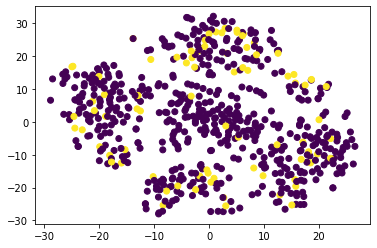

In [8]:
plt.scatter(myopia_cluster["x"], myopia_cluster["y"], c=myopia_cluster["class"])
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

In [9]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    

C:\Users\Kaiza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [12]:
elbow = pd.DataFrame({"k": range(1,11), "inertia": inertia})

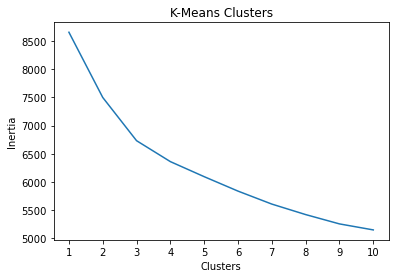

In [13]:
plt.plot(elbow["k"], elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Clusters")
plt.show()

## Determine where elbow of plot is 
Elbow of K-Means Cluster is third clusters since there are three breaks

# Part 4: Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

## My Recommendation:
Since there are three clusters shown in the elbow of K-Means Cluster curve, these three different clusters are most likely different sources. Therefore, analysis for these three different clusters should be done separately and compared against each other.